In [81]:
import pandas as pd
from pathlib import Path

In [82]:
ruta_base = Path.cwd()
ruta_base = ruta_base.parents[1]

In [83]:
ruta_rachas = ruta_base / 'Ejercicio3' / 'data' / 'raw' / 'rachas.xlsx'
historia_raw = pd.read_excel(ruta_rachas, sheet_name='historia')

In [84]:
historia_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   identificacion  2925 non-null   object        
 1   corte_mes       2925 non-null   datetime64[ns]
 2   saldo           2925 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 68.7+ KB


<Axes: >

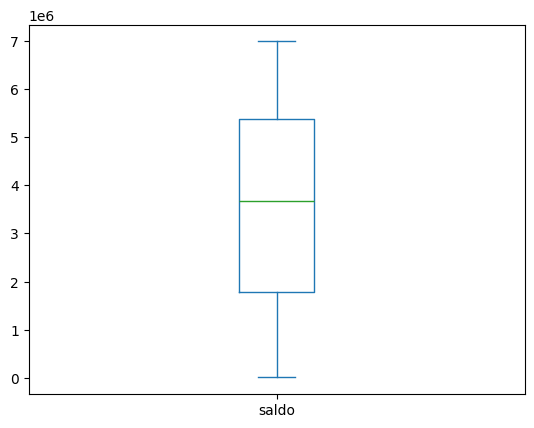

In [85]:
historia_raw['saldo'].plot(kind='box')

In [86]:
historia_raw['corte_mes'].apply(type).value_counts()


corte_mes
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    2925
Name: count, dtype: int64

In [87]:
fechas = pd.to_datetime(historia_raw['corte_mes'], errors='coerce')
print(fechas.min())
print(fechas.max())


2023-01-31 00:00:00
2024-12-31 00:00:00


In [88]:
retiros_raw = pd.read_excel(ruta_rachas, sheet_name='retiros')
retiros_raw.head()

,identificacion,fecha_retiro
0,0TTW5R9RRCJ0A9E5F,2024-10-10
1,1LFTDYT2H0I9ZGED3S8,2023-11-11
2,6T645BU8TYM8VGXKO,2025-01-10
3,869YG73INQB5W1NQT,2024-12-05
4,THJ9OBJH3W6ANRCMS,2024-01-20


In [89]:
retiros_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   identificacion  5 non-null      object        
 1   fecha_retiro    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 212.0+ bytes


In [90]:
ruta_tiempo = ruta_base / 'Ejercicio3' / 'data' / 'raw' / 'tiempo_rachas.xlsx'
tiempo_raw = pd.read_excel(ruta_tiempo)

In [91]:
tiempo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   29 non-null     datetime64[ns]
 1   id      29 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 596.0 bytes


In [92]:
import locale

locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

tiempo = tiempo_raw.copy()

tiempo['anio'] = tiempo['fecha '].dt.year
tiempo['mes'] = tiempo['fecha '].dt.month
tiempo['dia'] = tiempo['fecha '].dt.day
tiempo['nombre_mes'] = tiempo['fecha '].dt.strftime('%B')  
tiempo['dia_semana'] = tiempo['fecha '].dt.strftime('%A')      
tiempo['anio_mes'] = tiempo['fecha '].dt.strftime('%Y-%m')      
tiempo['semana_anio'] = tiempo['fecha '].dt.isocalendar().week  


In [93]:
tiempo['anio'] = tiempo['anio'].astype('Int64')
tiempo['mes'] = tiempo['mes'].astype('Int64')
tiempo['dia'] = tiempo['dia'].astype('Int64')
tiempo['semana_anio'] = tiempo['semana_anio'].astype('Int64')


In [94]:
tiempo

,fecha,id,anio,mes,dia,nombre_mes,dia_semana,anio_mes,semana_anio
0,2023-01-31,1,2023,1,31,enero,martes,2023-01,5
1,2023-02-28,2,2023,2,28,febrero,martes,2023-02,9
2,2023-03-31,3,2023,3,31,marzo,viernes,2023-03,13
3,2023-04-30,4,2023,4,30,abril,domingo,2023-04,17
4,2023-05-31,5,2023,5,31,mayo,miércoles,2023-05,22
5,2023-06-30,6,2023,6,30,junio,viernes,2023-06,26
6,2023-07-31,7,2023,7,31,julio,lunes,2023-07,31
7,2023-08-31,8,2023,8,31,agosto,jueves,2023-08,35
8,2023-09-30,9,2023,9,30,septiembre,sábado,2023-09,39
9,2023-10-31,10,2023,10,31,octubre,martes,2023-10,44


Mapeo de ids dimension tiempo

In [95]:
historia = historia_raw.copy()

In [96]:
print(tiempo_raw.columns.tolist())


['fecha ', 'id']


In [98]:
historia = historia.merge(tiempo[["fecha ", "id"]], left_on="corte_mes", right_on="fecha ", how="left") \
                   .rename(columns={"id": "id_fecha"}) \
                   .drop(columns=["fecha ","corte_mes"]) 

In [99]:
retiros = retiros_raw.copy()
retiros = retiros.merge(tiempo[["fecha ", "id"]], left_on="fecha_retiro", right_on="fecha ", how="left") \
                   .rename(columns={"id": "id_fecha"}) \
                   .drop(columns=["fecha ","fecha_retiro"]) 

Guardamos la data procesada en la carpeta correspondiente

In [102]:
carpeta_destino = ruta_base / 'Ejercicio3' / 'data' / 'processed'

retiros.to_csv(carpeta_destino / 'retiros.csv', index=False)
historia.to_csv(carpeta_destino / 'historia.csv', index=False)
tiempo.to_csv(carpeta_destino / 'tiempo.csv', index=False)